In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sonar-mine-dataset/sonar data.csv


## Data Pre-processing

In [40]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [41]:
# Loading the dataset to a pandas dataFrame

sonar_data = pd.read_csv('/kaggle/input/sonar-mine-dataset/sonar data.csv', header = None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [42]:
# Number of rows n cols
sonar_data.shape

(208, 61)

In [43]:
# Statistical Measures ( Mean, Std, min , percentile )
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [44]:
# Count of the values for any column

sonar_data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [45]:
# Seperating Data and Label

X = sonar_data.drop(columns = 60, axis = 1) # If droping column axis = 1, Else row axis = 0
Y = sonar_data[60]

In [46]:
# Spliting Training and Test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 1)


In [47]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


## Model Training


In [48]:
model = LogisticRegression()

In [49]:
model.fit(X_train, Y_train)

LogisticRegression()

In [50]:
# Model Evaluation

X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)


In [51]:
print(test_accuracy)

0.7619047619047619


### Deep Learning Model


In [52]:
# Convert label to 0 and 1
Y_train = Y_train.map({'M':1, 'R':0})
Y_test = Y_test.map({'M':1, 'R':0})

In [53]:
from tensorflow import keras
from tensorflow.keras import layers


In [69]:
input_shape = [60]
model = keras.Sequential([
    layers.Dense(units = 20, activation = 'relu'),
    layers.Dense(units = 20, activation = 'relu'),
    layers.Dense(units = 15, activation = 'relu'),
    layers.Dense(units = 10, activation = 'relu'),
    layers.Dense(units = 10, activation = 'relu'),

    

    layers.Dense(units = 1, activation = 'sigmoid')
    
])

In [70]:
model.compile( 
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['binary_accuracy']
)

model.fit(
    X_train, Y_train,
    batch_size = 16,
    epochs = 50,
)

In [71]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    batch_size = 16,
    epochs = 50,
)

Epoch 1/50
12/12 [==============================] - 2s 23ms/step - loss: 0.6926 - binary_accuracy: 0.5134 - val_loss: 0.6849 - val_binary_accuracy: 0.5714
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6881 - binary_accuracy: 0.5668 - val_loss: 0.6851 - val_binary_accuracy: 0.5714
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6752 - binary_accuracy: 0.5829 - val_loss: 0.6784 - val_binary_accuracy: 0.6190
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6601 - binary_accuracy: 0.6150 - val_loss: 0.6667 - val_binary_accuracy: 0.7143
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6405 - binary_accuracy: 0.6738 - val_loss: 0.6588 - val_binary_accuracy: 0.7143
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6088 - binary_accuracy: 0.7326 - val_loss: 0.6579 - val_binary_accuracy: 0.6190
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5

<Axes: title={'center': 'Accuracy'}>

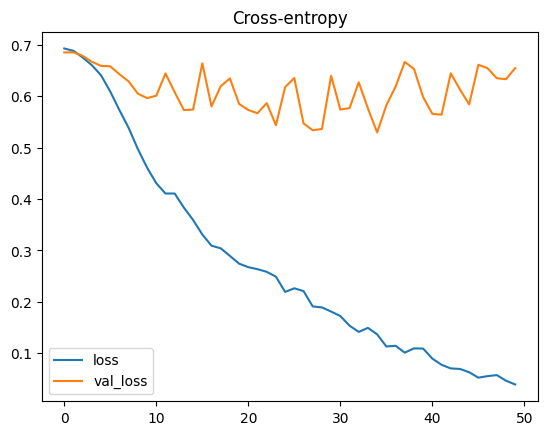

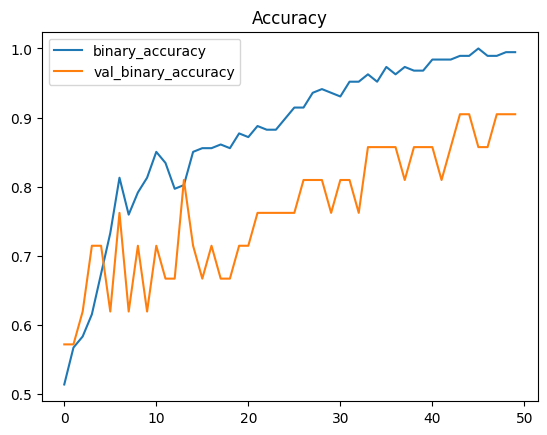

In [72]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")